In [1]:
%matplotlib inline

from fanutils import *

import numpy as np
import matplotlib.pyplot as plt


In [89]:
fancontroller = FanController()

# numfans = 2
fans = [Fan(2317, 6898, 0),
         Fan(2502, 7450, 1)] 
#define both fans such that you can have as many as you want without recoding
# technically the fanid argument is redundant here but i want the code to be usable in places other than this one



currenttemp = fancontroller.gethighestcputemp(fancontroller.getallcontrollerdata()) # do this once for all curve definitions
# if curves aren't defined with a generally correct current temp they may be at the wrong rpm for a second or two which bothers me
#fancurve(bottomanchor, topanchor, activationtemp, deactivationtemp, currentemp)
curve_old = [FanCurve((70, 100), (75, 70), (0,90), currenttemp),
          FanCurve((60, 95), (85, 80), (80,200), currenttemp),] 

curves = [FanCurve((70, 300), (75, 70), (0,80), currenttemp),
          FanCurve((78, 100), (80, 75), (80,90), currenttemp),
          FanCurve((73, 110), (82, 78), (78, 85), currenttemp),
          FanCurve((60, 95), (85, 70), (90,200), currenttemp),] t

#          FanCurve((70, 97), (82, 78), (78, 85), currenttemp),


In [108]:
def fill_blanks(numbers, n):
    filled_list = []

    for i in range(len(numbers) - 1):
        start = numbers[i]
        end = numbers[i + 1]

        # Generate numbers from start to end with interval n
        if start > end:
            filled_list.extend(list(range(start, end + 1, -n)))
        else:
            filled_list.extend(list(range(start, end + 1, n)))

    # Add the last number if it's not already included
    if filled_list[-1] != numbers[-1]:
        filled_list.append(numbers[-1])

    return filled_list


In [122]:
numbers = [60,100]
interval = 1

# Generate filled list with interval n
filled_list = fill_blanks(numbers, interval)
print([k for k in filled_list])

def calculate_percentages(filled_list):
    target_fan_percentages = []

    print(f"percentage testing? {curves[0].getcurverpm_updateall(90)}")

    for j in filled_list:
        print(f"current temp: {j}")
        target_percentage = []
        for i in curves:
            target_percentage.append(i.getcurverpm_updateall(j)) # calculate all curves & take highest rpm value for safety
            print(f"all percentages: {[i for i in target_percentage]}")

        try:
            target_fan_percentages.append(max(target_percentage))
        except:
            target_fan_percentages.append("\n\ncritical failure\n\n")

    print([i for i in target_fan_percentages])

    return target_fan_percentages




    


[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


percentage testing? 0.0
current temp: 60
all percentages: [0.0]
all percentages: [0.0, 0.0]
all percentages: [0.0, 0.0, 0.0]
all percentages: [0.0, 0.0, 0.0, 0.0]
current temp: 61
all percentages: [0.0]
all percentages: [0.0, 0.0]
all percentages: [0.0, 0.0, 0.0]
all percentages: [0.0, 0.0, 0.0, 0.0]
current temp: 62
all percentages: [0.0]
all percentages: [0.0, 0.0]
all percentages: [0.0, 0.0, 0.0]
all percentages: [0.0, 0.0, 0.0, 0.0]
current temp: 63
all percentages: [0.0]
all percentages: [0.0, 0.0]
all percentages: [0.0, 0.0, 0.0]
all percentages: [0.0, 0.0, 0.0, 0.0]
current temp: 64
all percentages: [0.0]
all percentages: [0.0, 0.0]
all percentages: [0.0, 0.0, 0.0]
all percentages: [0.0, 0.0, 0.0, 0.0]
current temp: 65
all percentages: [0.0]
all percentages: [0.0, 0.0]
all percentages: [0.0, 0.0, 0.0]
all percentages: [0.0, 0.0, 0.0, 0.0]
current temp: 66
all percentages: [0.0]
all percentages: [0.0, 0.0]
all percentages: [0.0, 0.0, 0.0]
all percentages: [0.0, 0.0, 0.0, 0.0]
cur

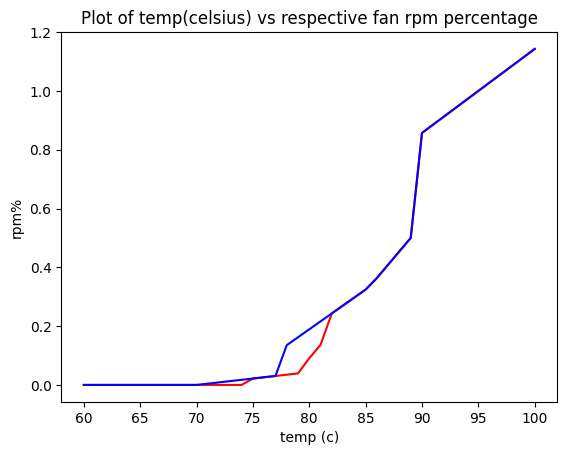

In [125]:
import matplotlib.pyplot as plt

# Example data (you can replace these with your own lists)
filled_list_up = fill_blanks([60,100], 1)
filled_list_down = fill_blanks([100,60], 1)

x = filled_list_up
x_down = filled_list_down
y = calculate_percentages(filled_list_up)
y_down = calculate_percentages(filled_list_down)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y, color="red")
ax.plot(x_down, y_down, color="blue")

# Set labels for x-axis and y-axis
ax.set_xlabel('temp (c)')
ax.set_ylabel('rpm%')

# Set title for the plot
ax.set_title('Plot of temp(celsius) vs respective fan rpm percentage')

# Display the plot
plt.show()
